In [4]:
import os
import itertools, collections
import numpy, scipy, pandas
import scipy.signal
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from imp import reload

from pgtools import toolbox, myplots
import pygbrowse
import empdist
from empdist import EmpiricalDistribution
# from peas import scoring, arrayfuncs, choosing
import peas

In [5]:
def heatmap_centered_cmap(data, heatmap_kwargs={}):
    extent = numpy.max(numpy.abs(data))
    seaborn.heatmap(data, vmin=-extent, vmax=extent, cmap='RdBu_r', **heatmap_kwargs)

def plot_fit_params(param_dict, param_names, fig_height=3):
    param_df = pandas.DataFrame(param_dict, index=param_names).T

    fig, axes = plt.subplots(1, len(param_names), figsize=(fig_height*len(param_names),fig_height))
    for ax_idx, param_name in enumerate(param_names):
        axes[ax_idx].plot(param_df[param_name])
        axes[ax_idx].set_title(param_name)
        axes[ax_idx].set_ylabel('Value')
        axes[ax_idx].set_xlabel('Sample size')
    fig.tight_layout()
    return fig

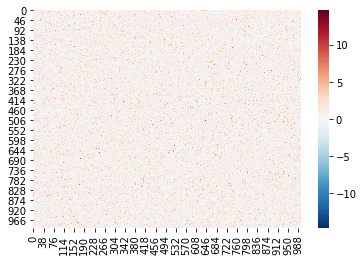

In [7]:
n=1000000
numpy.random.seed(1)
data_distro = scipy.stats.gumbel_r
test_data = data_distro().rvs(n)

test_matrix = test_data.reshape(1000,1000)
heatmap_centered_cmap(test_matrix)

In [9]:
%time ground_truth_means = peas.scoring.compute_mean_table_2d(test_matrix, start_diagonal=1, end_diagonal=500)


CPU times: user 93.2 ms, sys: 1.6 ms, total: 94.8 ms
Wall time: 103 ms


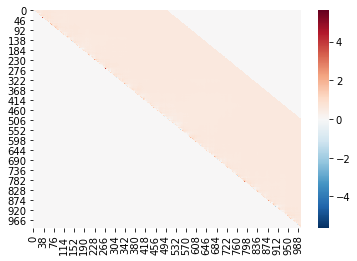

In [11]:
ground_truth_means = peas.scoring.compute_mean_table_2d(test_matrix, start_diagonal=1, end_diagonal=500)
heatmap_centered_cmap(ground_truth_means)

# Score by region mean

In [13]:
%%time
shuffled_means_ground_truth = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                  num_shuffles=100000,
                                                                  min_region_size=2,
                                                                  max_region_size=500,
                                                                  start_diagonal=1,
                                                                  matrix_score_func=peas.scoring.compute_mean_table_2d,
                                                                  random_seed=1,
                                                                 )

# %time shuffled_means_ground_truth = {size:numpy.sort(data) for size, data in shuffled_means_ground_truth.items()}

2018-Aug-29 10:14:47				permutation 22429 of 100000
2018-Aug-29 10:14:52				permutation 22492 of 100000
2018-Aug-29 10:14:57				permutation 22555 of 100000
2018-Aug-29 10:15:02				permutation 22618 of 100000
2018-Aug-29 10:15:07				permutation 22680 of 100000
2018-Aug-29 10:15:12				permutation 22742 of 100000
2018-Aug-29 10:15:17				permutation 22804 of 100000
2018-Aug-29 10:15:22				permutation 22867 of 100000
2018-Aug-29 10:15:27				permutation 22930 of 100000
2018-Aug-29 10:15:32				permutation 22992 of 100000
2018-Aug-29 10:15:37				permutation 23054 of 100000
2018-Aug-29 10:15:42				permutation 23117 of 100000
2018-Aug-29 10:15:47				permutation 23180 of 100000
2018-Aug-29 10:15:52				permutation 23243 of 100000
2018-Aug-29 10:15:57				permutation 23305 of 100000
2018-Aug-29 10:16:02				permutation 23368 of 100000
2018-Aug-29 10:16:07				permutation 23430 of 100000
2018-Aug-29 10:16:12				permutation 23493 of 100000
2018-Aug-29 10:16:17				permutation 23555 of 100000
2018-Aug-29 

2018-Aug-29 10:28:02				permutation 32064 of 100000
2018-Aug-29 10:28:07				permutation 32124 of 100000
2018-Aug-29 10:28:12				permutation 32184 of 100000
2018-Aug-29 10:28:17				permutation 32244 of 100000
2018-Aug-29 10:28:22				permutation 32304 of 100000
2018-Aug-29 10:28:27				permutation 32364 of 100000
2018-Aug-29 10:28:32				permutation 32424 of 100000
2018-Aug-29 10:28:37				permutation 32484 of 100000
2018-Aug-29 10:28:42				permutation 32544 of 100000
2018-Aug-29 10:28:47				permutation 32604 of 100000
2018-Aug-29 10:28:52				permutation 32664 of 100000
2018-Aug-29 10:28:57				permutation 32724 of 100000
2018-Aug-29 10:29:02				permutation 32784 of 100000
2018-Aug-29 10:29:07				permutation 32844 of 100000
2018-Aug-29 10:29:12				permutation 32904 of 100000
2018-Aug-29 10:29:17				permutation 32964 of 100000
2018-Aug-29 10:29:22				permutation 33024 of 100000
2018-Aug-29 10:29:27				permutation 33084 of 100000
2018-Aug-29 10:29:32				permutation 33144 of 100000
2018-Aug-29 

2018-Aug-29 10:41:15				permutation 41545 of 100000
2018-Aug-29 10:41:20				permutation 41606 of 100000
2018-Aug-29 10:41:25				permutation 41666 of 100000
2018-Aug-29 10:41:30				permutation 41726 of 100000
2018-Aug-29 10:41:35				permutation 41786 of 100000
2018-Aug-29 10:41:40				permutation 41846 of 100000
2018-Aug-29 10:41:45				permutation 41906 of 100000
2018-Aug-29 10:41:50				permutation 41966 of 100000
2018-Aug-29 10:41:55				permutation 42026 of 100000
2018-Aug-29 10:42:00				permutation 42086 of 100000
2018-Aug-29 10:42:05				permutation 42146 of 100000
2018-Aug-29 10:42:10				permutation 42206 of 100000
2018-Aug-29 10:42:15				permutation 42266 of 100000
2018-Aug-29 10:42:20				permutation 42326 of 100000
2018-Aug-29 10:42:25				permutation 42386 of 100000
2018-Aug-29 10:42:30				permutation 42446 of 100000
2018-Aug-29 10:42:35				permutation 42506 of 100000
2018-Aug-29 10:42:40				permutation 42566 of 100000
2018-Aug-29 10:42:45				permutation 42626 of 100000
2018-Aug-29 

2018-Aug-29 10:54:30				permutation 51208 of 100000
2018-Aug-29 10:54:35				permutation 51271 of 100000
2018-Aug-29 10:54:40				permutation 51333 of 100000
2018-Aug-29 10:54:45				permutation 51396 of 100000
2018-Aug-29 10:54:50				permutation 51459 of 100000
2018-Aug-29 10:54:55				permutation 51521 of 100000
2018-Aug-29 10:55:00				permutation 51584 of 100000
2018-Aug-29 10:55:05				permutation 51646 of 100000
2018-Aug-29 10:55:10				permutation 51708 of 100000
2018-Aug-29 10:55:15				permutation 51771 of 100000
2018-Aug-29 10:55:20				permutation 51834 of 100000
2018-Aug-29 10:55:25				permutation 51897 of 100000
2018-Aug-29 10:55:30				permutation 51959 of 100000
2018-Aug-29 10:55:36				permutation 52022 of 100000
2018-Aug-29 10:55:41				permutation 52085 of 100000
2018-Aug-29 10:55:46				permutation 52148 of 100000
2018-Aug-29 10:55:51				permutation 52210 of 100000
2018-Aug-29 10:55:56				permutation 52272 of 100000
2018-Aug-29 10:56:01				permutation 52335 of 100000
2018-Aug-29 

2018-Aug-29 11:07:46				permutation 60542 of 100000
2018-Aug-29 11:07:51				permutation 60584 of 100000
2018-Aug-29 11:07:56				permutation 60629 of 100000
2018-Aug-29 11:08:01				permutation 60676 of 100000
2018-Aug-29 11:08:06				permutation 60722 of 100000
2018-Aug-29 11:08:11				permutation 60763 of 100000
2018-Aug-29 11:08:16				permutation 60808 of 100000
2018-Aug-29 11:08:21				permutation 60852 of 100000
2018-Aug-29 11:08:26				permutation 60905 of 100000
2018-Aug-29 11:08:31				permutation 60950 of 100000
2018-Aug-29 11:08:36				permutation 60999 of 100000
2018-Aug-29 11:08:42				permutation 61044 of 100000
2018-Aug-29 11:08:47				permutation 61087 of 100000
2018-Aug-29 11:08:52				permutation 61127 of 100000
2018-Aug-29 11:08:57				permutation 61178 of 100000
2018-Aug-29 11:09:02				permutation 61227 of 100000
2018-Aug-29 11:09:07				permutation 61277 of 100000
2018-Aug-29 11:09:12				permutation 61332 of 100000
2018-Aug-29 11:09:17				permutation 61387 of 100000
2018-Aug-29 

2018-Aug-29 11:21:03				permutation 68945 of 100000
2018-Aug-29 11:21:08				permutation 69007 of 100000
2018-Aug-29 11:21:13				permutation 69066 of 100000
2018-Aug-29 11:21:18				permutation 69126 of 100000
2018-Aug-29 11:21:24				permutation 69185 of 100000
2018-Aug-29 11:21:29				permutation 69242 of 100000
2018-Aug-29 11:21:34				permutation 69299 of 100000
2018-Aug-29 11:21:39				permutation 69353 of 100000
2018-Aug-29 11:21:44				permutation 69411 of 100000
2018-Aug-29 11:21:49				permutation 69470 of 100000
2018-Aug-29 11:21:54				permutation 69529 of 100000
2018-Aug-29 11:21:59				permutation 69589 of 100000
2018-Aug-29 11:22:04				permutation 69648 of 100000
2018-Aug-29 11:22:09				permutation 69704 of 100000
2018-Aug-29 11:22:14				permutation 69763 of 100000
2018-Aug-29 11:22:19				permutation 69821 of 100000
2018-Aug-29 11:22:24				permutation 69874 of 100000
2018-Aug-29 11:22:29				permutation 69930 of 100000
2018-Aug-29 11:22:34				permutation 69991 of 100000
2018-Aug-29 

2018-Aug-29 11:34:20				permutation 78133 of 100000
2018-Aug-29 11:34:25				permutation 78192 of 100000
2018-Aug-29 11:34:30				permutation 78251 of 100000
2018-Aug-29 11:34:35				permutation 78310 of 100000
2018-Aug-29 11:34:40				permutation 78369 of 100000
2018-Aug-29 11:34:45				permutation 78428 of 100000
2018-Aug-29 11:34:50				permutation 78487 of 100000
2018-Aug-29 11:34:55				permutation 78546 of 100000
2018-Aug-29 11:35:01				permutation 78605 of 100000
2018-Aug-29 11:35:06				permutation 78664 of 100000
2018-Aug-29 11:35:11				permutation 78723 of 100000
2018-Aug-29 11:35:16				permutation 78780 of 100000
2018-Aug-29 11:35:21				permutation 78838 of 100000
2018-Aug-29 11:35:26				permutation 78896 of 100000
2018-Aug-29 11:35:31				permutation 78954 of 100000
2018-Aug-29 11:35:36				permutation 79012 of 100000
2018-Aug-29 11:35:41				permutation 79070 of 100000
2018-Aug-29 11:35:46				permutation 79128 of 100000
2018-Aug-29 11:35:51				permutation 79185 of 100000
2018-Aug-29 

2018-Aug-29 11:47:37				permutation 87440 of 100000
2018-Aug-29 11:47:42				permutation 87493 of 100000
2018-Aug-29 11:47:47				permutation 87547 of 100000
2018-Aug-29 11:47:52				permutation 87601 of 100000
2018-Aug-29 11:47:57				permutation 87653 of 100000
2018-Aug-29 11:48:03				permutation 87706 of 100000
2018-Aug-29 11:48:08				permutation 87759 of 100000
2018-Aug-29 11:48:13				permutation 87812 of 100000
2018-Aug-29 11:48:18				permutation 87865 of 100000
2018-Aug-29 11:48:23				permutation 87918 of 100000
2018-Aug-29 11:48:28				permutation 87972 of 100000
2018-Aug-29 11:48:33				permutation 88027 of 100000
2018-Aug-29 11:48:38				permutation 88082 of 100000
2018-Aug-29 11:48:43				permutation 88137 of 100000
2018-Aug-29 11:48:48				permutation 88193 of 100000
2018-Aug-29 11:48:53				permutation 88249 of 100000
2018-Aug-29 11:48:58				permutation 88305 of 100000
2018-Aug-29 11:49:03				permutation 88361 of 100000
2018-Aug-29 11:49:08				permutation 88419 of 100000
2018-Aug-29 

2018-Aug-29 12:00:55				permutation 95694 of 100000
2018-Aug-29 12:01:00				permutation 95743 of 100000
2018-Aug-29 12:01:05				permutation 95793 of 100000
2018-Aug-29 12:01:11				permutation 95844 of 100000
2018-Aug-29 12:01:16				permutation 95893 of 100000
2018-Aug-29 12:01:21				permutation 95943 of 100000
2018-Aug-29 12:01:26				permutation 95993 of 100000
2018-Aug-29 12:01:31				permutation 96043 of 100000
2018-Aug-29 12:01:36				permutation 96095 of 100000
2018-Aug-29 12:01:41				permutation 96145 of 100000
2018-Aug-29 12:01:46				permutation 96193 of 100000
2018-Aug-29 12:01:51				permutation 96242 of 100000
2018-Aug-29 12:01:56				permutation 96291 of 100000
2018-Aug-29 12:02:01				permutation 96340 of 100000
2018-Aug-29 12:02:06				permutation 96389 of 100000
2018-Aug-29 12:02:11				permutation 96437 of 100000
2018-Aug-29 12:02:16				permutation 96484 of 100000
2018-Aug-29 12:02:21				permutation 96534 of 100000
2018-Aug-29 12:02:26				permutation 96584 of 100000
2018-Aug-29 

KeyboardInterrupt: 

CPU times: user 3h 6min 40s, sys: 46min 15s, total: 3h 52min 55s
Wall time: 2h 58min 23s


In [19]:
from pgtools import toolbox
for size in shuffled_means_ground_truth:
    print(size)
    shuffled_means_ground_truth[size] = toolbox.replace_with_mem_map(arr=numpy.sort(shuffled_means_ground_truth[size]), 
                                                                     read_only=True, 
                                                                     tmp_dir='~/tmp')


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [22]:
%%time
shuffled_means_test = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                  num_shuffles=100,
                                                                  min_region_size=2,
                                                                  max_region_size=500,
                                                                  start_diagonal=1,
                                                                  matrix_score_func=peas.scoring.compute_mean_table_2d,
                                                                  random_seed=2,
                                                                 )

2018-Aug-29 14:12:55			Setting random seed to 2
2018-Aug-29 14:12:55				permutation 1 of 100
2018-Aug-29 14:13:00				permutation 54 of 100
CPU times: user 9.18 s, sys: 170 ms, total: 9.35 s
Wall time: 9.44 s


In [24]:
%time shuffled_means_test = {size:toolbox.replace_with_mem_map(numpy.sort(data), read_only=True, tmp_dir='~/tmp') for size, data in shuffled_means_test.items()}

CPU times: user 3.5 s, sys: 536 ms, total: 4.03 s
Wall time: 8.2 s


In [33]:
reload(peas.scoring)
reload(peas.fitapproxdistros.helper_funcs)
reload(peas.fitapproxdistros.distributions)

<module 'peas.fitapproxdistros.distributions' from '/gpfs/data01/glasslab/home/dskola/workspace/PEAS/peas/fitapproxdistros/distributions.py'>

## Linear piecewise distribution

In [28]:
%%time
shuffled_distros_linear_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=peas.fitapproxdistros.distributions.PiecewiseApproxLinear,
                                                       parameter_smoothing_window_size=None,
                                                                               fit_kwargs={'is_sorted':True})

2018-Aug-29 14:13:52			size: 2 fit parameters: [-0.37890964 -0.90778486]
2018-Aug-29 14:13:52			size: 3 fit parameters: [ 0.19266767 -1.81026337]
2018-Aug-29 14:13:52			size: 4 fit parameters: [ 0.37143061 -2.7838965 ]
2018-Aug-29 14:13:53			size: 5 fit parameters: [ 0.43980007 -3.74672024]
2018-Aug-29 14:13:53			size: 6 fit parameters: [ 0.47819557 -4.71924505]
2018-Aug-29 14:13:53			size: 7 fit parameters: [ 0.4970075  -5.66057604]
2018-Aug-29 14:13:53			size: 8 fit parameters: [ 0.51112652 -6.63087836]
2018-Aug-29 14:13:53			size: 9 fit parameters: [ 0.52003558 -7.56076533]
2018-Aug-29 14:13:53			size: 10 fit parameters: [ 0.53059653 -8.54397457]
2018-Aug-29 14:13:53			size: 11 fit parameters: [ 0.53545931 -9.47207846]
2018-Aug-29 14:13:53			size: 12 fit parameters: [  0.54008917 -10.45632003]
2018-Aug-29 14:13:53			size: 13 fit parameters: [  0.54410811 -11.45156177]
2018-Aug-29 14:13:53			size: 14 fit parameters: [  0.54729563 -12.44284339]
2018-Aug-29 14:13:53			size: 15 fit para

2018-Aug-29 14:14:02			size: 112 fit parameters: [   0.57293884 -101.60090286]
2018-Aug-29 14:14:02			size: 113 fit parameters: [   0.57295374 -102.43681943]
2018-Aug-29 14:14:02			size: 114 fit parameters: [   0.57296628 -103.2680886 ]
2018-Aug-29 14:14:02			size: 115 fit parameters: [   0.57298843 -104.16286188]
2018-Aug-29 14:14:02			size: 116 fit parameters: [   0.57297027 -104.76717647]
2018-Aug-29 14:14:02			size: 117 fit parameters: [   0.57302783 -105.89751403]
2018-Aug-29 14:14:02			size: 118 fit parameters: [   0.57303965 -106.66573259]
2018-Aug-29 14:14:02			size: 119 fit parameters: [   0.57308739 -107.72150667]
2018-Aug-29 14:14:02			size: 120 fit parameters: [   0.57309837 -108.50923086]
2018-Aug-29 14:14:03			size: 121 fit parameters: [   0.57315806 -109.63718568]
2018-Aug-29 14:14:03			size: 122 fit parameters: [   0.5731835  -110.57148559]
2018-Aug-29 14:14:03			size: 123 fit parameters: [   0.57320799 -111.46039148]
2018-Aug-29 14:14:03			size: 124 fit parameters: [  

2018-Aug-29 14:14:09			size: 216 fit parameters: [   0.57421604 -190.86949764]
2018-Aug-29 14:14:09			size: 217 fit parameters: [   0.57422571 -191.69836845]
2018-Aug-29 14:14:09			size: 218 fit parameters: [   0.57423806 -192.62664731]
2018-Aug-29 14:14:09			size: 219 fit parameters: [   0.57423079 -193.11762823]
2018-Aug-29 14:14:09			size: 220 fit parameters: [   0.57423128 -193.66455516]
2018-Aug-29 14:14:09			size: 221 fit parameters: [   0.57425648 -194.81418559]
2018-Aug-29 14:14:09			size: 222 fit parameters: [   0.57427046 -195.81794201]
2018-Aug-29 14:14:09			size: 223 fit parameters: [   0.57427093 -196.45882377]
2018-Aug-29 14:14:09			size: 224 fit parameters: [   0.57427251 -197.03851106]
2018-Aug-29 14:14:09			size: 225 fit parameters: [   0.57428584 -197.91569296]
2018-Aug-29 14:14:10			size: 226 fit parameters: [   0.57429624 -198.78167776]
2018-Aug-29 14:14:10			size: 227 fit parameters: [   0.57428307 -198.95810573]
2018-Aug-29 14:14:10			size: 228 fit parameters: [  

2018-Aug-29 14:14:16			size: 322 fit parameters: [   0.5747843  -271.64590429]
2018-Aug-29 14:14:16			size: 323 fit parameters: [   0.57478687 -272.24765789]
2018-Aug-29 14:14:16			size: 324 fit parameters: [   0.57478921 -272.86862674]
2018-Aug-29 14:14:16			size: 325 fit parameters: [   0.57480563 -274.13855802]
2018-Aug-29 14:14:16			size: 326 fit parameters: [   0.57482771 -275.72252375]
2018-Aug-29 14:14:16			size: 327 fit parameters: [   0.57482566 -276.0448907 ]
2018-Aug-29 14:14:16			size: 328 fit parameters: [   0.57483535 -276.9820281 ]
2018-Aug-29 14:14:16			size: 329 fit parameters: [   0.57484945 -278.19750445]
2018-Aug-29 14:14:16			size: 330 fit parameters: [   0.57485643 -278.84191398]
2018-Aug-29 14:14:16			size: 331 fit parameters: [   0.57486205 -279.61691991]
2018-Aug-29 14:14:16			size: 332 fit parameters: [   0.57485902 -279.90141364]
2018-Aug-29 14:14:17			size: 333 fit parameters: [   0.57487677 -281.32469592]
2018-Aug-29 14:14:17			size: 334 fit parameters: [  

2018-Aug-29 14:14:21			size: 426 fit parameters: [   0.57550751 -372.57900883]
2018-Aug-29 14:14:21			size: 427 fit parameters: [   0.5755158  -373.93553503]
2018-Aug-29 14:14:22			size: 428 fit parameters: [   0.57551482 -374.45594212]
2018-Aug-29 14:14:22			size: 429 fit parameters: [   0.57552057 -375.59556326]
2018-Aug-29 14:14:22			size: 430 fit parameters: [   0.57552291 -376.2426656 ]
2018-Aug-29 14:14:22			size: 431 fit parameters: [   0.57552253 -376.80526392]
2018-Aug-29 14:14:22			size: 432 fit parameters: [   0.57552992 -378.22919177]
2018-Aug-29 14:14:22			size: 433 fit parameters: [   0.57552831 -378.71509404]
2018-Aug-29 14:14:22			size: 434 fit parameters: [   0.57553026 -379.5751488 ]
2018-Aug-29 14:14:22			size: 435 fit parameters: [   0.57553618 -380.6712781 ]
2018-Aug-29 14:14:22			size: 436 fit parameters: [   0.57553896 -381.58255672]
2018-Aug-29 14:14:22			size: 437 fit parameters: [   0.57554793 -383.28314962]
2018-Aug-29 14:14:22			size: 438 fit parameters: [  

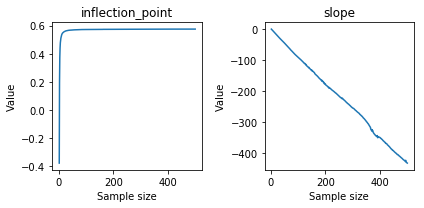

In [29]:
fig = plot_fit_params(shuffled_distros_linear_params, ['inflection_point', 'slope'])

In [30]:
predicted_mean_distros_linear = {size:peas.fitapproxdistros.distributions.PiecewiseApproxLinear(*params) for size, params in shuffled_distros_linear_params.items()}

## LinearDirect

In [34]:
%%time
shuffled_distros_lineardirect_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=peas.fitapproxdistros.distributions.PiecewiseApproxLinearDirect,
                                                       parameter_smoothing_window_size=None,
                                                                               fit_kwargs={'is_sorted':True})

Max examined data point: 5.559142762627303
2018-Aug-29 14:14:55			size: 2 fit parameters: (0.5833177599270974, -1.1099613741861034)
Max examined data point: 3.097319919246614
2018-Aug-29 14:14:55			size: 3 fit parameters: (0.5802910563327951, -2.1938453494756924)
Max examined data point: 2.2312969236415188
2018-Aug-29 14:14:55			size: 4 fit parameters: (0.5797737804947536, -3.342956223175013)
Max examined data point: 1.8000692687804694
2018-Aug-29 14:14:55			size: 5 fit parameters: (0.5795343957820805, -4.522579558282193)
Max examined data point: 1.569616933442118
2018-Aug-29 14:14:55			size: 6 fit parameters: (0.5793643513795406, -5.573286711317873)
Max examined data point: 1.3990312692456297
2018-Aug-29 14:14:55			size: 7 fit parameters: (0.5790932161040467, -6.7297230747181285)
Max examined data point: 1.2774762032624487
2018-Aug-29 14:14:55			size: 8 fit parameters: (0.5787830726433303, -7.89609810346572)
Max examined data point: 1.1890660952159744
2018-Aug-29 14:14:55			size: 9 fi

Max examined data point: 0.5951337743374043
2018-Aug-29 14:14:55			size: 267 fit parameters: (0.5765807370985827, -281.0715762854443)
Max examined data point: 0.5950571029533874
2018-Aug-29 14:14:55			size: 268 fit parameters: (0.5765817524615204, -282.1796596363134)
Max examined data point: 0.5949885408252292
2018-Aug-29 14:14:55			size: 269 fit parameters: (0.5765826216233042, -283.1699350078263)
Max examined data point: 0.5948655170894418
2018-Aug-29 14:14:55			size: 270 fit parameters: (0.5765833816451177, -285.01243328566943)
Max examined data point: 0.5947687277816505
2018-Aug-29 14:14:55			size: 271 fit parameters: (0.5765844060422973, -286.4702393877839)
Max examined data point: 0.5947044402000663
2018-Aug-29 14:14:55			size: 272 fit parameters: (0.57658554809763, -287.4290651432079)
Max examined data point: 0.5946462167538202
2018-Aug-29 14:14:55			size: 273 fit parameters: (0.5765867170957916, -288.2983278636769)
Max examined data point: 0.5946592651286828
2018-Aug-29 14:14:5

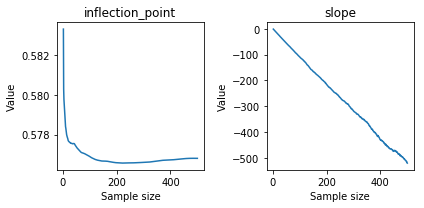

In [35]:
fig = plot_fit_params(shuffled_distros_lineardirect_params, ['inflection_point', 'slope'])

In [36]:
predicted_mean_distros_lineardirect = {size:peas.fitapproxdistros.distributions.PiecewiseApproxLinearDirect(*params) for size, params in shuffled_distros_lineardirect_params.items()}

## Piecewise power tail

In [37]:
%%time
shuffled_distros_power_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=peas.fitapproxdistros.distributions.PiecewiseApproxPower,
                                                       parameter_smoothing_window_size=None)

2018-Aug-29 14:15:03			size: 2 fit parameters: (-0.8206638352362993, 1.2279297237063287, -0.5674477736162754)
2018-Aug-29 14:15:03			size: 3 fit parameters: (-0.4315417360861419, 1.5600652156211239, -0.7722331910500648)
2018-Aug-29 14:15:03			size: 4 fit parameters: (-0.2577884733739989, 1.8252295586246132, -1.045085469929518)
2018-Aug-29 14:15:03			size: 5 fit parameters: (-0.15305754468061752, 2.041401480622611, -1.4074690471090778)
2018-Aug-29 14:15:03			size: 6 fit parameters: (-0.007102236245249078, 2.0442926475957184, -2.1756528987174035)
2018-Aug-29 14:15:03			size: 7 fit parameters: (0.0622749207992131, 2.133280290615274, -2.9708001975212643)
2018-Aug-29 14:15:03			size: 8 fit parameters: (0.11304864156694748, 2.22254501298331, -3.9333360622756763)
2018-Aug-29 14:15:03			size: 9 fit parameters: (0.16279974375648745, 2.2556093857915602, -5.202610622739738)
2018-Aug-29 14:15:03			size: 10 fit parameters: (0.19540236499654823, 2.303719163223226, -6.587329326349845)
2018-Aug-29 14:

2018-Aug-29 14:15:06			size: 78 fit parameters: (0.5279620922453517, 2.4771813618037246, -1205.951079717016)
2018-Aug-29 14:15:06			size: 79 fit parameters: (0.5286927833610988, 2.4735158252393092, -1241.4931839299309)
2018-Aug-29 14:15:06			size: 80 fit parameters: (0.5290495589320097, 2.4832516338356854, -1299.4144547448648)
2018-Aug-29 14:15:06			size: 81 fit parameters: (0.5298587643731688, 2.475445632598072, -1321.7461696214136)
2018-Aug-29 14:15:06			size: 82 fit parameters: (0.5305741701852322, 2.470584025311146, -1355.7762593427608)
2018-Aug-29 14:15:06			size: 83 fit parameters: (0.5300287747221483, 2.5115875317411622, -1501.9452609264472)
2018-Aug-29 14:15:06			size: 84 fit parameters: (0.529964057261145, 2.538860989998381, -1627.270058111121)
2018-Aug-29 14:15:06			size: 85 fit parameters: (0.5312769776178812, 2.5087043660597423, -1587.557015040226)
2018-Aug-29 14:15:06			size: 86 fit parameters: (0.5325631689956535, 2.4790601792828397, -1546.0501360922538)
2018-Aug-29 14:15

2018-Aug-29 14:15:08			size: 153 fit parameters: (0.5511052060393373, 2.472828384663076, -6211.299884660717)
2018-Aug-29 14:15:08			size: 154 fit parameters: (0.5513912233483362, 2.463908159046631, -6184.518052178685)
2018-Aug-29 14:15:08			size: 155 fit parameters: (0.5518729932530455, 2.4400426641713726, -5920.444941737017)
2018-Aug-29 14:15:09			size: 156 fit parameters: (0.5519297765276439, 2.447537713101994, -6124.0373952117225)
2018-Aug-29 14:15:09			size: 157 fit parameters: (0.5517135920106941, 2.4724041582671457, -6564.993246617967)
2018-Aug-29 14:15:09			size: 158 fit parameters: (0.551911028435005, 2.468694016970053, -6577.453804832052)
2018-Aug-29 14:15:09			size: 159 fit parameters: (0.5519026428451499, 2.477836388739526, -6887.901788729054)
2018-Aug-29 14:15:09			size: 160 fit parameters: (0.5519773144976343, 2.4833871588154985, -7069.932587801376)
2018-Aug-29 14:15:09			size: 161 fit parameters: (0.5521598816307141, 2.480207955195077, -7097.394217116889)
2018-Aug-29 14:1

2018-Aug-29 14:15:11			size: 230 fit parameters: (0.5603682767065822, 2.3663558028149083, -12429.508478835964)
2018-Aug-29 14:15:11			size: 231 fit parameters: (0.5604940337901724, 2.3584022352850154, -12248.33484080989)
2018-Aug-29 14:15:11			size: 232 fit parameters: (0.5606213954576148, 2.3522858637748776, -12164.538538844721)
2018-Aug-29 14:15:11			size: 233 fit parameters: (0.5605184897800705, 2.3675571828602875, -12731.727747181378)
2018-Aug-29 14:15:11			size: 234 fit parameters: (0.5606782650423612, 2.355934445957734, -12445.4786139464)
2018-Aug-29 14:15:11			size: 235 fit parameters: (0.5606815889550659, 2.3597518564233573, -12605.204581733475)
2018-Aug-29 14:15:11			size: 236 fit parameters: (0.5608331199068137, 2.348358683732147, -12276.82516095094)
2018-Aug-29 14:15:11			size: 237 fit parameters: (0.5608330492142417, 2.353696995573155, -12627.325755448219)
2018-Aug-29 14:15:11			size: 238 fit parameters: (0.5609120924349982, 2.3506455062590534, -12572.919891904741)
2018-Aug

2018-Aug-29 14:15:13			size: 306 fit parameters: (0.5635764784418962, 2.4493469632710516, -30179.10619780594)
2018-Aug-29 14:15:13			size: 307 fit parameters: (0.5637323411140441, 2.4336121958193915, -28982.174237639836)
2018-Aug-29 14:15:13			size: 308 fit parameters: (0.5638559855120902, 2.422963800994724, -28262.594625657533)
2018-Aug-29 14:15:13			size: 309 fit parameters: (0.563809052942342, 2.435674896808505, -29499.57007581527)
2018-Aug-29 14:15:13			size: 310 fit parameters: (0.5638370186855362, 2.4373816963139148, -29940.7701036188)
2018-Aug-29 14:15:13			size: 311 fit parameters: (0.5638784775006923, 2.437927158610402, -30419.98290497221)
2018-Aug-29 14:15:13			size: 312 fit parameters: (0.5640070682610618, 2.425619734607541, -29487.167705376356)
2018-Aug-29 14:15:13			size: 313 fit parameters: (0.5640904973558445, 2.418534380654033, -28916.34013778567)
2018-Aug-29 14:15:13			size: 314 fit parameters: (0.5641691000616904, 2.4134765000638767, -28740.147498932332)
2018-Aug-29 1

2018-Aug-29 14:15:15			size: 386 fit parameters: (0.5648971791677743, 2.808202177841467, -175143.81763710018)
2018-Aug-29 14:15:15			size: 387 fit parameters: (0.5646051623126954, 2.8654791949266394, -212367.6430650424)
2018-Aug-29 14:15:15			size: 388 fit parameters: (0.5646884639958832, 2.857105562463362, -208611.24906586346)
2018-Aug-29 14:15:15			size: 389 fit parameters: (0.5645286858122891, 2.8909076041906827, -234168.36971062364)
2018-Aug-29 14:15:15			size: 390 fit parameters: (0.564516193327833, 2.899126005227329, -241741.88147860309)
2018-Aug-29 14:15:15			size: 391 fit parameters: (0.5650004582560156, 2.8174499323787856, -186387.85047556917)
2018-Aug-29 14:15:15			size: 392 fit parameters: (0.564738756882723, 2.8707671176311207, -223128.18650115252)
2018-Aug-29 14:15:15			size: 393 fit parameters: (0.5649118473067711, 2.8440307327719023, -206014.89768419604)
2018-Aug-29 14:15:16			size: 394 fit parameters: (0.5647965919821519, 2.8698231038412665, -225383.79238861686)
2018-Au

2018-Aug-29 14:15:17			size: 467 fit parameters: (0.5704611511609472, 2.059714927605512, -23123.73757179664)
2018-Aug-29 14:15:18			size: 468 fit parameters: (0.5705183877263007, 2.04920577891422, -22347.06916675101)
2018-Aug-29 14:15:18			size: 469 fit parameters: (0.5705959813813586, 2.034912220556421, -21322.773275765496)
2018-Aug-29 14:15:18			size: 470 fit parameters: (0.5706623017079215, 2.0224448484147435, -20338.485152692636)
2018-Aug-29 14:15:18			size: 471 fit parameters: (0.5706802165945457, 2.021457336399485, -20400.262046268872)
2018-Aug-29 14:15:18			size: 472 fit parameters: (0.5707311835574578, 2.012566447912145, -19804.87164391835)
2018-Aug-29 14:15:18			size: 473 fit parameters: (0.570674472490853, 2.029385500282034, -21339.76466216126)
2018-Aug-29 14:15:18			size: 474 fit parameters: (0.5707635785992605, 2.012176788243296, -20045.575808644564)
2018-Aug-29 14:15:18			size: 475 fit parameters: (0.5708297536233392, 1.9988567452169594, -19110.821542856087)
2018-Aug-29 14

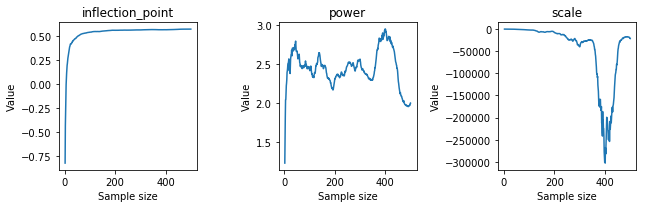

In [38]:
fig = plot_fit_params(shuffled_distros_power_params, ['inflection_point', 'power', 'scale'])

In [39]:
predicted_mean_distros_power = {size:peas.fitapproxdistros.distributions.PiecewiseApproxPower(*params) for size, params in shuffled_distros_power_params.items()}

## Analytical normal

In [40]:
%%time
shuffled_distros_norm_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=scipy.stats.norm,
                                                       parameter_smoothing_window_size=None)

2018-Aug-29 14:15:19			size: 2 fit parameters: (0.5833177599270974, 1.288308921073225)
2018-Aug-29 14:15:19			size: 3 fit parameters: (0.5802910563327951, 0.7446617038224108)
2018-Aug-29 14:15:19			size: 4 fit parameters: (0.5797737804947536, 0.5266223288934093)
2018-Aug-29 14:15:19			size: 5 fit parameters: (0.5795343957820805, 0.40735110742244757)
2018-Aug-29 14:15:19			size: 6 fit parameters: (0.5793643513795406, 0.33212713699377233)
2018-Aug-29 14:15:19			size: 7 fit parameters: (0.5790932161040467, 0.28072184885142015)
2018-Aug-29 14:15:19			size: 8 fit parameters: (0.5787830726433303, 0.24319963385143187)
2018-Aug-29 14:15:19			size: 9 fit parameters: (0.5784968848237733, 0.214602423562712)
2018-Aug-29 14:15:19			size: 10 fit parameters: (0.578402464920227, 0.19203944995372021)
2018-Aug-29 14:15:19			size: 11 fit parameters: (0.5783229706622179, 0.17376990583204904)
2018-Aug-29 14:15:19			size: 12 fit parameters: (0.5782008971338934, 0.15864682513240422)
2018-Aug-29 14:15:19			si

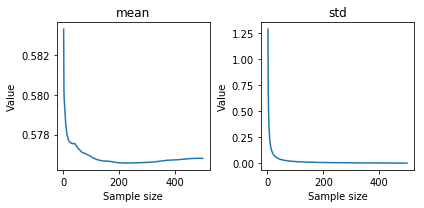

In [41]:
fig = plot_fit_params(shuffled_distros_norm_params, ['mean', 'std'])

In [42]:
predicted_mean_distros_norm = {size:scipy.stats.norm(*params) for size, params in shuffled_distros_norm_params.items()}

## Evaluate

In [43]:
def rms(X, Y):
    return numpy.sqrt(numpy.mean((X - Y)**2))


def determine_max_test_value(empirical_sample):
    return empdist.empirical_pval.compute_empirical_quantile(data=empirical_sample, 
                                                             q=1-empdist.empirical_pval.compute_p_confidence(len(empirical_sample)), 
                                                             is_sorted=True)
    
    
def evaluate_fits(size, ground_truth_shuffled_data, distros_by_size, test_vector):

    ground_truth_empirical_pvalues = empdist.empirical_pval.compute_empirical_pvalue(ground_truth_shuffled_data[size],
                                                                             test_vector, tail='right', 
                                                                              is_sorted=True)
    ground_truth_empirical_pscores = -10 * numpy.log(ground_truth_empirical_pvalues)
    test_pscores = -10 * distros_by_size[size].logsf(test_vector)
    
    return test_vector, ground_truth_empirical_pscores, test_pscores

In [44]:
size = 495
min_size = min(numpy.diag(ground_truth_means, size-1))
max_size = determine_max_test_value(shuffled_means_ground_truth[size])
print('Maximum tested value: {}'.format(max_size))
test_vector = numpy.linspace(min_size, max_size, num=100)

Maximum tested value: 0.5918780250835425


RMS: 16.923919994255662


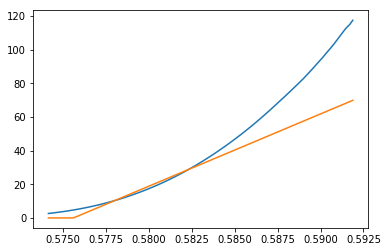

In [45]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_linear, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

RMS: 14.234682276947387


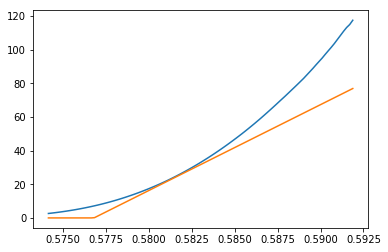

In [46]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_lineardirect, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

RMS: 10.52896166337964


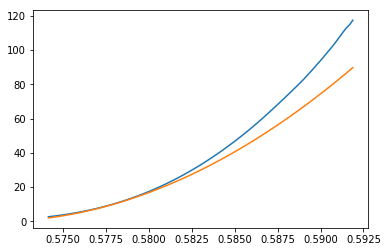

In [47]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_power, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

RMS: 3.1650771339598816


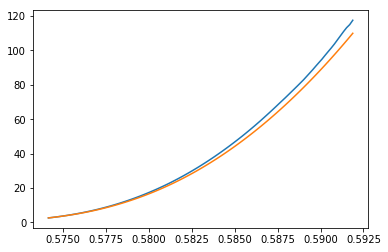

In [48]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_norm, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

## Test fits systematically across distribution types

In [49]:
from peas.utilities import log_print

In [ ]:
distro_collections = {'analytical_norm':predicted_mean_distros_norm, 
                      'pw_linear': predicted_mean_distros_linear,
                      'pw_lineardirect':predicted_mean_distros_lineardirect,
                      'pw_power':predicted_mean_distros_power}
all_distro_rms = {}
for distro_name, distro_set in distro_collections.items():
    all_distro_rms[distro_name] = {}
    for size in sorted(distro_set.keys()):
        min_size = min(numpy.diag(test_matrix, size-1))
        max_size = determine_max_test_value(shuffled_means_ground_truth[size])
        print('Maximum tested value: {}'.format(max_size))
        test_vector = numpy.linspace(min_size, max_size, num=100)
        
        test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, 
                                                       distro_set, 
                                                       test_vector=test_vector)
        
        this_rms = rms(true_ys, predicted_ys)
        all_distro_rms[distro_name][size] = this_rms
        log_print((distro_name, size, this_rms))

Maximum tested value: 12.149126790859942
2018-Aug-29 14:19:04	('analytical_norm', 2, 121.03682912836791)
Maximum tested value: 5.722329478212939
2018-Aug-29 14:21:20	('analytical_norm', 3, 48.12893240446442)
Maximum tested value: 3.7990926531802063
2018-Aug-29 14:23:48	('analytical_norm', 4, 27.826410162795874)
Maximum tested value: 2.9051153827788894
2018-Aug-29 14:26:12	('analytical_norm', 5, 18.88807908167538)
Maximum tested value: 2.394944267447888
2018-Aug-29 14:28:18	('analytical_norm', 6, 13.354606109498487)
Maximum tested value: 2.0607651564832374
2018-Aug-29 14:30:29	('analytical_norm', 7, 9.979374668223507)
Maximum tested value: 1.8370258983039938
2018-Aug-29 14:33:03	('analytical_norm', 8, 8.051166219250376)
Maximum tested value: 1.6623300693057692
2018-Aug-29 14:35:30	('analytical_norm', 9, 6.6243614296146225)
Maximum tested value: 1.5355442570726079
2018-Aug-29 14:37:58	('analytical_norm', 10, 5.429332578186612)
Maximum tested value: 1.4336101722058363
2018-Aug-29 14:40:22

In [ ]:
gumbel_rms_results = pandas.DataFrame(all_distro_rms)

In [ ]:
gumbel_rms_results = pandas.DataFrame(all_distro_rms)
gumbel_rms_results.to_csv('~/workspace/coupled_peaks_methods_paper/gumbel_data_rms_results_100000.csv')

## Show where empirical sampling tops out

## Make q-q plots (and use to determine when to switch to analytical normal)

## Make argument for empirical distribution from kurtosis